In [50]:
!pip install geopandas
!pip install contextily
!pip install cartopy

In [215]:
import gzip
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import *
import json

In [52]:
def read_file(filepath):
  try:
    with open(filepath, 'r') as f:
      content = f.read()
    return content
  except FileNotFoundError:
    print(f"Error: File '{filepath}' not found.")
    return None

# Example usage: Assuming 'rotation.rot' is in the current directory
rot = read_file('rotation.rot')
rot

'83330  0.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83330 85.96   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83330 100.0  -58.51  -33.61    0.45  8333 !Calculated interactively by GPlates \n83330 600.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83340  0.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83340 85.96   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83340 100.0    4.41  -31.26    1.52  8334 !Calculated interactively by GPlates \n83340 600.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83350  0.0   90.0    0.0    0.0  8335 !  Reinga Ridge outer boundary - Reinga Ridge \n83350 85.96   90.0    0.0    0.0  8335 !  Reinga Ridge outer boundary - Reinga Ridge \n83350 100.0   23.07  -11.72    2.46  8335 !Calculated interactively by GPlates \n83350 600.0   9

In [53]:
rot = rot.strip().split('\n')
rot[:7]

['83330  0.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83330 85.96   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83330 100.0  -58.51  -33.61    0.45  8333 !Calculated interactively by GPlates ',
 '83330 600.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83340  0.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge ',
 '83340 85.96   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge ',
 '83340 100.0    4.41  -31.26    1.52  8334 !Calculated interactively by GPlates ']

In [54]:
rot[1000:1010]

['201065 20.0  -12.62   28.92    0.55  201 ! Andes Fix sw 2013-05-29 ',
 '201065 25.0  -12.62   28.92    0.55  201 ! Andes Fix sw 2013-05-29 ',
 '201065 30.0  -12.62   28.92    0.54  201 ! Andes Fix sw 2013-05-29 ',
 '201065 35.0  -12.62   28.92    0.54  201 ! Andes Fix sw 2013-05-29 ',
 '201065 40.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201065 45.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201065 600.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201066  0.0   90.0    0.0    0.0  201 ! Andes Fix sw 2013-05-29 ',
 '201066  5.0  -45.99   53.74    0.17  201 ! Andes Fix sw 2013-05-29 ',
 '201066 10.0  -40.95   48.73    0.32  201 ! Andes Fix sw 2013-05-29 ']

In [100]:
import gzip
import shutil

def unzip_gzip_file(input_file, output_file):
    """Unzips a gzip file.

    Args:
        input_file: Path to the gzip file.
        output_file: Path to the output file (unzipped).
    """
    try:
        with gzip.open(input_file, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Successfully unzipped '{input_file}' to '{output_file}'")
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage
unzip_gzip_file('coastlines.gpmlz', 'coastlines.gpml')

Successfully unzipped 'coastlines.gpmlz' to 'coastlines.gpml'


In [106]:
unzip_gzip_file('/content/data/coastlines.gpmlz', '/content/data/coastlines.gpml')

Successfully unzipped '/content/data/coastlines.gpmlz' to '/content/data/coastlines.gpml'


In [116]:
unzip_gzip_file('/content/data/continents.gpmlz', '/content/data/continents.gpml')

Successfully unzipped '/content/data/continents.gpmlz' to '/content/data/continents.gpml'


In [203]:
unzip_gzip_file('/content/data/dynamicPolygons.gpmlz', '/content/data/dynamicPolygons.gpml')

Error: File '/content/data/dynamicPolygons.gpmlz' not found.


In [5]:
gpml = read_file('coastlines.gpml')

In [ ]:
coords_df['name'].unique()

array(['Pacific', 'Marie Byrd Land', 'Africa', 'Northwest Africa',
       'Caribbean Ocean Floor', 'Zamboanga Peninsula', 'Andaman Sea west',
       'North America', 'South America', 'South Bismark Basin',
       'Halmahera Basin', 'Corsica/Sardinia', 'Sandwich Plate',
       'Falkland Plateau, trapped Scotia Sea', 'Iberia', 'Eurasia',
       'Nazca', 'Palawan Block', 'Solomon Sea', 'Farallon', 'Cocos',
       'Greenland', 'De Long/Henrietta Block', 'Sea of Okhotsk',
       'Macquarie Ridge', 'Outer Bering Shelf',
       'Northwest South Fiji Basin', 'Seychelles', 'Madagascar', 'Arabia',
       'Somalia', 'Australia', 'Antarctica',
       'Santa Cruz Basin, Lord Howe Rise', 'Owen Basin',
       'Northwest Africa-Bahamas'], dtype=object)

In [ ]:
polygons = []
for feature in features:
    for coord_set in feature['coordinates']:
        # Convert to format expected by Shapely
        polygon = Polygon(coord_set)
        polygons.append({
            'name': feature['name'],
            'geometry': polygon
        })

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(polygons)

In [157]:
tree = ET.parse('coastlines.gpml')
root = tree.getroot()

In [158]:
namespaces = {
    'gml': 'http://www.opengis.net/gml',
    'gpml': 'http://www.gplates.org/gplates'
}

In [159]:
root

<Element '{http://www.gplates.org/gplates}FeatureCollection' at 0x7a5272fed940>

In [160]:
features = root.findall('.//gml:featureMember', namespaces)

In [161]:
featureTypes = set()
for feature in features:
    # Get all immediate children of this feature
    children = list(feature)
    assert len(children) == 1

    tag_name = children[0].tag.split('}')[-1]  # This removes the namespace part
    featureTypes.add(tag_name)

print(featureTypes)

{'IslandArc', 'Basin', 'ClosedContinentalBoundary'}


In [162]:
continents = root.findall('.//gpml:ClosedContinentalBoundary', namespaces)
len(continents)

1781

In [163]:
positions = root.findall('.//gml:posList', namespaces)
len(positions)

2503

In [172]:
def create_plate_map(polygons):
    # Create figure with Robinson projection
    fig = plt.figure(figsize=(15, 10))
    proj = ccrs.Robinson()
    ax = plt.axes(projection=proj)

    # Add global features
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # Plot each plate polygon - with correct transform
    for poly in polygons:
        ax.add_geometries([poly],
                         crs=ccrs.PlateCarree(),  # Source CRS
                         facecolor='none',
                         edgecolor='red',
                         linewidth=2)

    # Set title
    plt.title('Tectonic Plates Reconstruction')

    return fig, ax

In [165]:
polygons = []
for position in positions:
    position_list = position.text.split()
    coord_pairs = [(float(position_list[i]), float(position_list[i+1]))
                             for i in range(0, len(position_list), 2)]
    polygons.append(Polygon(coord_pairs))

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Reconstruction'}>)

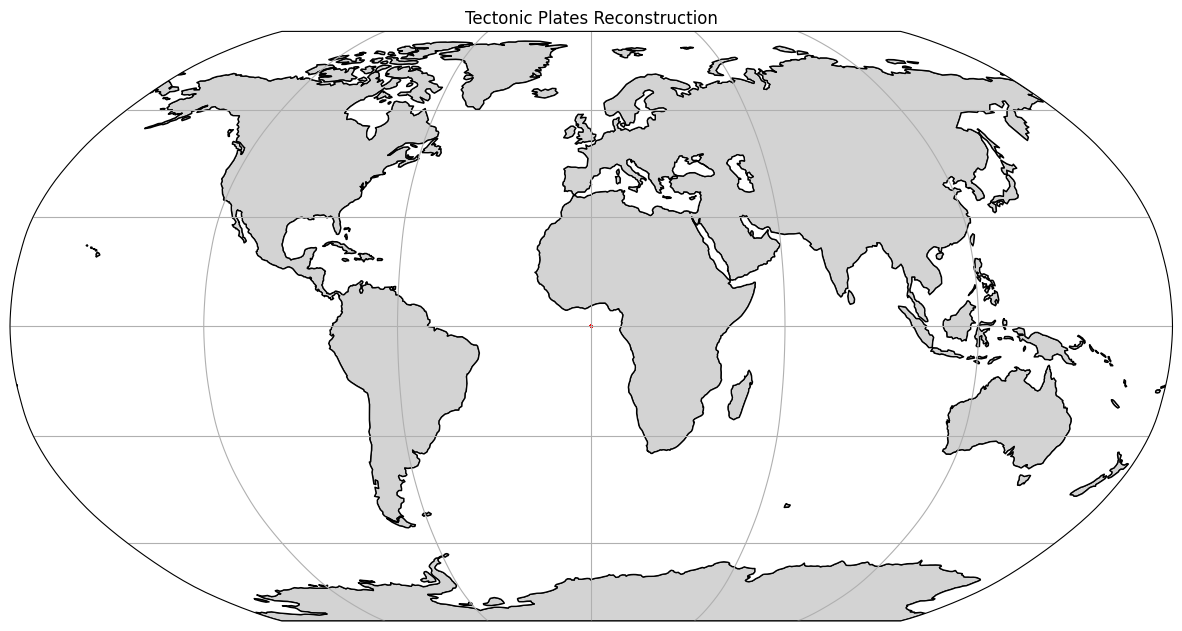

In [166]:
create_plate_map(polygons)

In [40]:
features[0].findall('.//gml:validTime//gml:end//gml:timePosition', namespaces)[0].text

'http://gplates.org/times/distantFuture'

In [60]:
timeRanges = []
for f in features:
    start = float(f.findall('.//gml:validTime//gml:begin//gml:timePosition', namespaces)[0].text)
    end = f.findall('.//gml:validTime//gml:end//gml:timePosition', namespaces)[0].text

    if end == 'http://gplates.org/times/distantFuture':
        end = 0
    else:
        end = float(end)

    timeRanges.append((start, end))

timeRanges

[(0.4, 0),
 (1.3, 0),
 (2.6, 0),
 (5.1, 0),
 (1.3, 0),
 (1.3, 0),
 (5.1, 0),
 (1.3, 0),
 (83.0, 0),
 (0.0, 0),
 (40.0, 0),
 (85.0, 0),
 (0.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (30.0, 0),
 (150.0, 0),
 (150.0, 0),
 (150.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (5.0, 0),
 (5.0, 0),
 (5.0, 0),
 (5.0, 0),
 (5.0, 0),
 (5.0, 0),
 (50.0, 0),
 (50.0, 0),
 (30.0, 0),
 (40.0, 0),
 (40.0, 0),
 (50.0, 0),
 (50.0, 0),
 (154.3, 0),
 (154.3, 0),
 (154.3, 0),
 (83.0, 0),
 (83.0, 0),
 (30.0, 0),
 (30.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0, 0),
 (600.0

In [49]:
all(x[1] == 0 for x in timeRanges)

True

In [90]:
processedFeatures = []

In [91]:
features = root.findall('.//gml:featureMember', namespaces)
for feature in features:
    data = {}
    # Get all immediate children of this feature
    children = list(feature)
    assert len(children) == 1

    tag_name = children[0].tag.split('}')[-1]  # This removes the namespace part

    data['type'] = tag_name

    start = float(feature.findall('.//gml:validTime//gml:begin//gml:timePosition', namespaces)[0].text)
    end = feature.findall('.//gml:validTime//gml:end//gml:timePosition', namespaces)[0].text

    if end == 'http://gplates.org/times/distantFuture':
        end = 0
    else:
        end = float(end)

    data['start'] = start
    data['end'] = end


    plateId = feature.findall('.//gpml:reconstructionPlateId//gpml:value', namespaces)[0].text
    data['plateId'] = plateId

    name = feature.findall('.//gml:name', namespaces)[0].text
    data['name'] = name

    geometry = feature.find('.//gml:posList', namespaces).text.split()
    coord_pairs = [(float(geometry[i]), float(geometry[i+1]))
                             for i in range(0, len(geometry), 2)]
    data['geometry'] = coord_pairs

    processedFeatures.append(data)

processedFeatures

[{'type': 'Basin',
  'start': 0.4,
  'end': 0,
  'plateId': '901',
  'name': 'Pacific',
  'geometry': [(19.85355599999994, -155.08441699999997),
   (19.729971999999975, -155.087806),
   (19.738222000000007, -155.00502799999998),
   (19.519139000000024, -154.80575),
   (19.346417000000088, -154.97772200000003),
   (19.136611000000016, -155.50566700000002),
   (18.913056000000097, -155.67533299999997),
   (18.998167000000024, -155.78688900000003),
   (19.085082999999997, -155.91097199999996),
   (19.346499999999935, -155.88933300000002),
   (19.72963900000005, -156.06461099999996),
   (19.98366699999994, -155.83116699999994),
   (20.197389000000015, -155.90624999999997),
   (20.27277799999996, -155.853389),
   (19.975000000000023, -155.210139),
   (19.85355599999994, -155.08441699999997)]},
 {'type': 'Basin',
  'start': 1.3,
  'end': 0,
  'plateId': '901',
  'name': 'Pacific',
  'geometry': [(21.033472000000103, -156.59055600000002),
   (20.899193999999937, -156.477194),
   (20.945917000

In [92]:
with open('processed_features.json', 'w') as f:
  f.write(json.dumps(processedFeatures, indent=4))

In [98]:
rotation = read_file('/content/data/rotation.rot').strip().split('\n')
print(rotation[0:10])
print(len(rotation))

['000   0.0    0.00    0.00  0.00 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146", Anchor 666666 if you want to activate the NNR frame', '000   1.0   25.92 -127.66  0.02 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   2.0   25.97 -127.99  0.05 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   3.0   26.45 -128.75  0.07 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   4.0   28.07 -129.24  0.09 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   5.0   30.73 -128.99  0.11 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   6.0   37.64 -124.50  0.13 666666 !No-Net-Rotation mantle reference frame, Zahirovic_++_2022 @DOI"10.1002/gdj3.146" ', '000   7.0   40.77 -119.79  0.15 666666 !No-Net-Rotation mantle referenc

In [253]:
tree = ET.parse('/content/data/staticPolygons.gpml')
root = tree.getroot()
len(root)

2471

In [254]:
positions = root.findall('.//gml:posList', namespaces)
len(positions)

2486

In [255]:
polygons = []
for position in positions:
    position_list = position.text.split()
    coord_pairs = [(float(position_list[i+1]), float(position_list[i]))
                             for i in range(0, len(position_list), 2)]
    polygons.append(Polygon(coord_pairs))
    # polygons.append(LineString(coord_pairs))

In [256]:
print(polygons[0])

POLYGON ((-152.61909999999997 32.346700000000055, -152.30609999999996 29.601300000000037, -158.26219999999998 28.800000000000065, -157.62339999999998 23.92280000000006, -156.83159999999998 24.041400000000067, -156.38359999999997 21.38240000000008, -150.73679999999996 22.317900000000066, -150.54769999999996 16.346100000000035, -148.77899999999997 16.379000000000076, -148.71019999999996 14.10170000000005, -151.39619999999996 13.844200000000058, -149.26399999999998 3.3585000000000496, -151.65652552099996 3.20468653100005, -151.65689999999998 3.205600000000061, -157.88069999999996 17.248200000000054, -160.23319999999998 16.714600000000075, -160.90657029199997 18.372388082000043, -162.01789999999997 21.108400000000074, -166.53269999999998 20.158900000000074, -168.77839999999998 26.19960000000003, -168.28351316299998 26.324428537000074, -164.19539999999998 27.355600000000038, -166.52479999999997 35.79460000000006, -173.51009999999997 34.14160000000004, -176.65022122699997 43.152461741000025,

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Boundaries'}>)

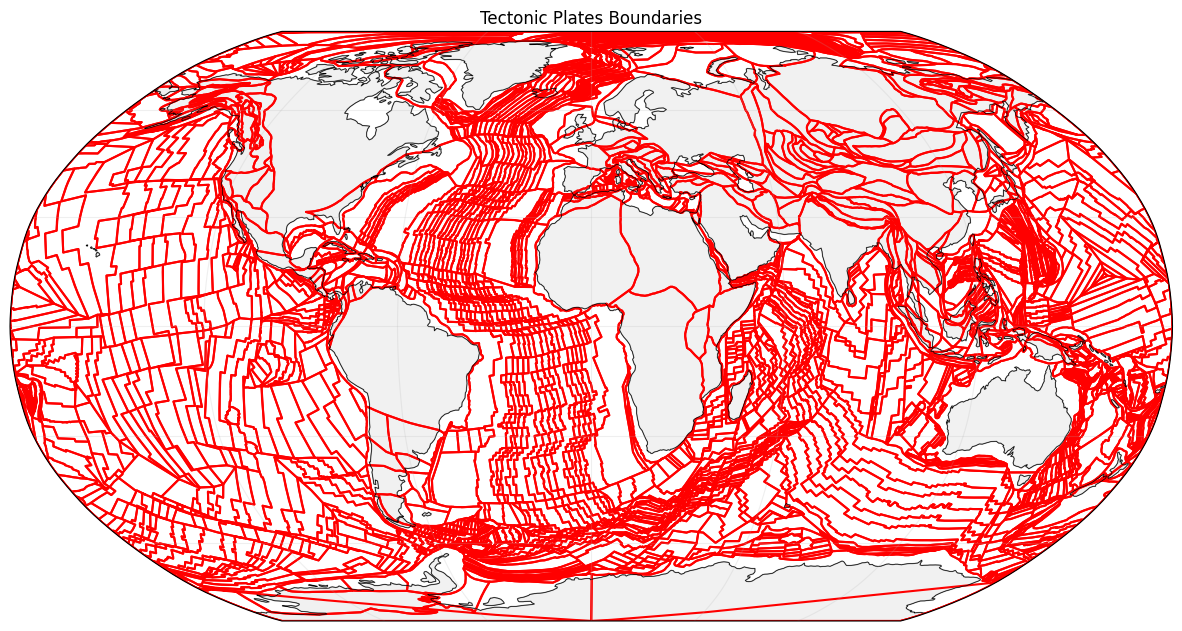

In [257]:
create_plate_map(polygons)

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Boundaries'}>)

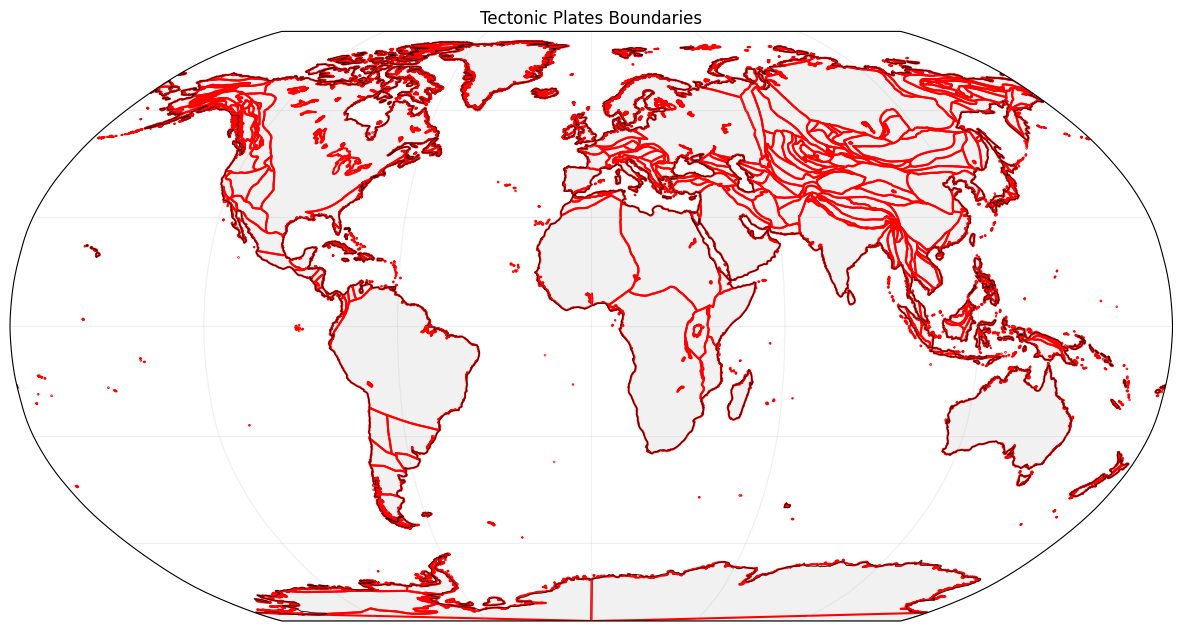

In [197]:
create_plate_map(polygons)

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Boundaries'}>)

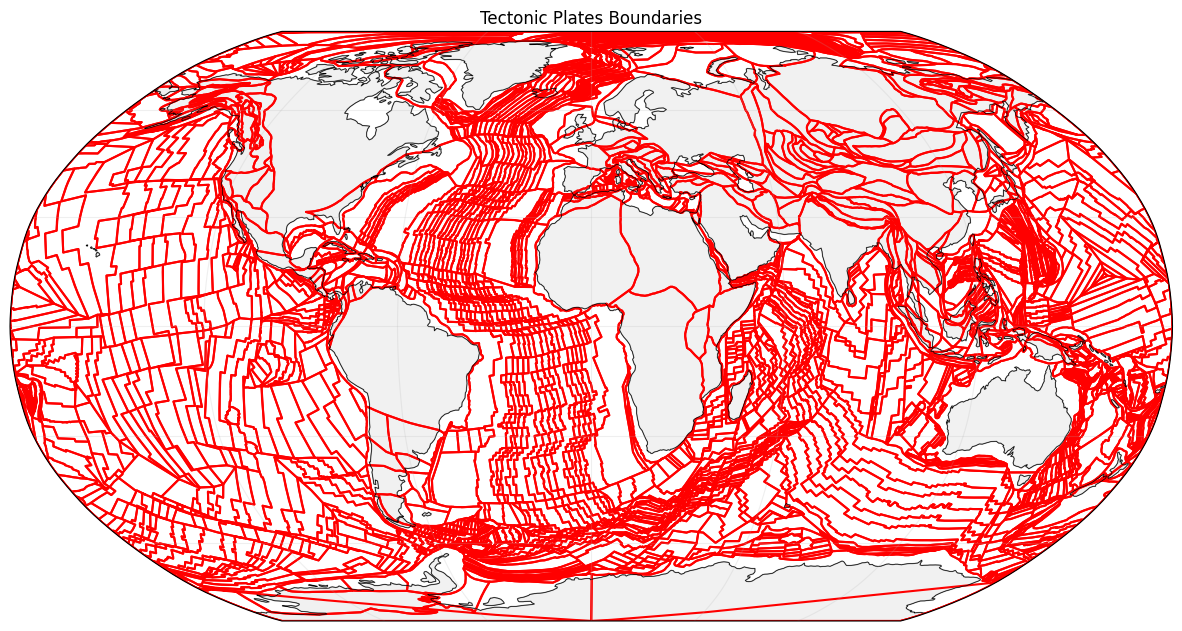

In [225]:
create_plate_map(polygons)

In [176]:
# Debug info
print(f"Number of polygons found: {len(polygons)}")
if polygons:
    # Print first few coordinates of first polygon
    first_poly_coords = list(polygons[0].exterior.coords)[:5]
    print(f"Sample coordinates from first polygon: {first_poly_coords}")

Number of polygons found: 2486
Sample coordinates from first polygon: [(32.346700000000055, -152.61909999999997), (29.601300000000037, -152.30609999999996), (28.800000000000065, -158.26219999999998), (23.92280000000006, -157.62339999999998), (24.041400000000067, -156.83159999999998)]


In [182]:
print(f'Root: {len(root)}')
print(f'PosList: {len(root.findall(".//gml:posList", namespaces))}')
print(f'ReconstructionPlateIds: {len(root.findall(".//gpml:reconstructionPlateId//gpml:value", namespaces))}')

Root: 2471
PosList: 2486
PosList: 2471


In [187]:
plateIds = [int(i.text) for i in root.findall(".//gpml:reconstructionPlateId//gpml:value", namespaces)]
print(len(set(plateIds)))

429


In [259]:
tree = ET.parse('/content/data/staticPolygons.gpml')
root = tree.getroot()
features = root.findall('.//gml:featureMember', namespaces)

In [260]:
majorPlateIds = {701, 101, 201, 301, 801, 802, 901}

In [261]:
majorPlatePolygons = []
for feature in features:
    assert len(feature) == 1
    feature = feature[0]

    plateIds = feature.findall(".//gpml:reconstructionPlateId//gpml:value", namespaces)
    plateId = int(plateIds[0].text)
    if plateId not in majorPlateIds:
        continue

    positions = feature.findall('.//gml:posList', namespaces)
    for position in positions:
        position_list = position.text.split()
        coord_pairs = [(float(position_list[i+1]), float(position_list[i]))
                                for i in range(0, len(position_list), 2)]
        majorPlatePolygons.append(Polygon(coord_pairs))


majorPlatePolygons

[<POLYGON ((-152.619 32.347, -152.306 29.601, -158.262 28.8, -157.623 23.923,...>,
 <POLYGON ((-180 23.179, -180 26.164, -179.91 26.059, -179.621 26.148, -179.4...>,
 <POLYGON ((-180 26.164, -180 32.009, -179.154 29.895, -178.855 29.267, -178....>,
 <POLYGON ((161.275 13.793, 158.537 12.76, 158.538 12.76, 160.41 14.524, 160....>,
 <POLYGON ((151.342 30.221, 153.614 26.635, 153.611 26.629, 152.025 24.644, 1...>,
 <POLYGON ((180 47.378, 180 42.578, 179.992 42.576, 179.988 42.575, 179.979 4...>,
 <POLYGON ((180 50.517, 180 49.422, 177.659 49.349, 177.688 48.622, 176.586 4...>,
 <POLYGON ((-180 17.059, -180 23.179, -178.979 23.678, -178.974 23.669, -179....>,
 <POLYGON ((-180 4.731, -180 10.037, -178.864 10.418, -177.966 10.738, -166.7...>,
 <POLYGON ((-112.163 19.726, -111.086 19.728, -111.264 19.272, -111.492 18.60...>,
 <POLYGON ((-121.975 8.254, -127.339 7.621, -128.499 17.09, -128.539 17.489, ...>,
 <POLYGON ((-161.903 49.156, -157.802 51.385, -156.997 49.877, -156.645 49.19...>,
 <PO

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Boundaries'}>)

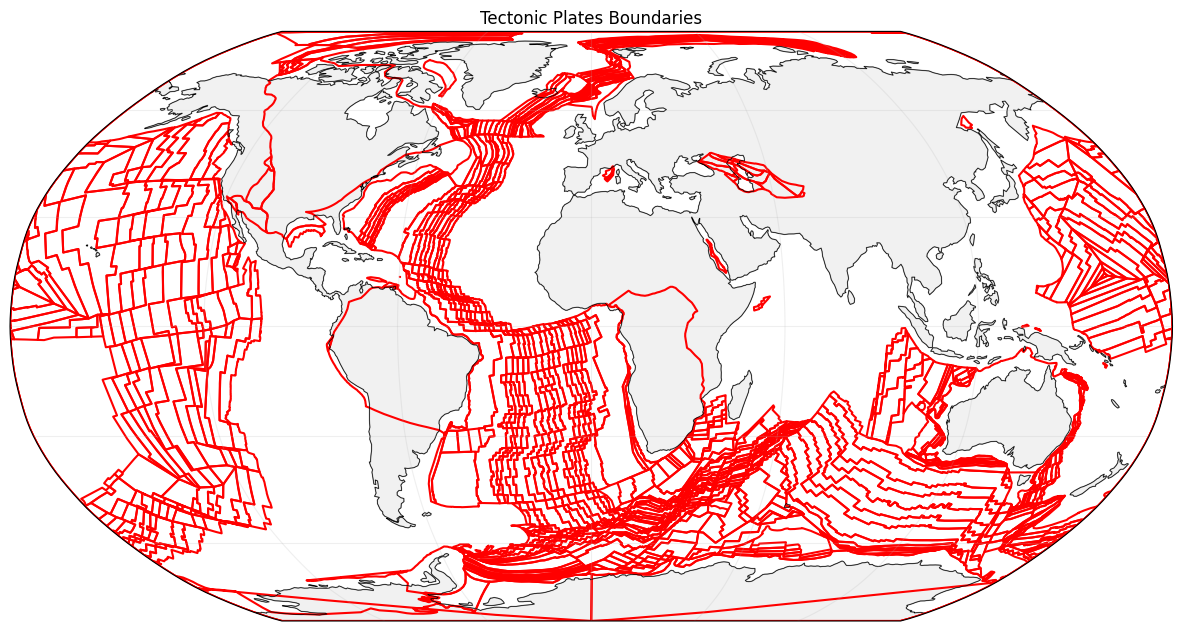

In [262]:
create_plate_map(majorPlatePolygons)